# Trabalho A1

Esse relatório descreve o trabalho desenvolvido para a disciplina de Projeto e Análise de Algoritmos, ministrada pelo professor Thiago Pinheiro de Araújo, no 4º período do curso de Ciência de Dados e IA. O objetivo do trabalho é **desenvolver um DataGrid utilizando a linguagem de programação Python para recebecer, ordenar, filtrar e selecionar dados.**

O trabalho foi desenvolvido pelos seguintes alunos:

- **Almir Augusto Fonseca** (221708004)
- **Lavínia Silva Dias** (221708013)
- **George Dutra** (221708043)
- **Isabela Yabe Martinez** (221708032)

---

### Sumário:

- [1. Estruturação básica](#1.-Estruturação-básica)
- [2. Algoritmos de busca, ordenação e seleção](#2.-Algoritmos-de-busca,-ordenação-e-seleção)
    - [Algoritmos de busca](#Algoritmos-de-busca)
- [3. Comparação entre os algoritmos](#3.-Comparação-entre-os-algoritmos)
    - [Comparação de busca](#Comparação-de-busca)
- [4. Conclusão](#4.-Conclusão)

---

## 1. Estruturação básica

O DataGrid foi desenvolvido utilizando a linguagem de programação Python, com o auxílio de algumas bibliotecas para tarefas secundárias (as quais não deveriam, necessariamente, ser implementadas pelos alunos). Abaixo, segue a lista de bibliotecas utilizadas:

- TODO: Listar as bibliotecas utilizadas e a função de cada uma no nosso trabalho

Contudo, mesmo com o auxílio de bibliotecas, o trabalho foi desenvolvido de forma a implementar os algoritmos de busca, ordenação e seleção, de forma a entender o funcionamento de cada um deles e comparar a eficiência de cada um. E para estruturar o DataGrid, foram criadas as seguintes classes:

- **Event**: classe responsável por armazenar os dados de um evento (`id`, `owner_id`, `creation_date`, `count`, `name` e `content`), representando uma linha/instância do DataGrid. Além desses campos, outra entrada foi adicionada para facilitar a implementação dos algoritmos de busca, ordenação e seleção: 
    - `timestamp`: representa o campo `creation_date` em formato de timestamp (um inteiro).
- **DataGrid**: classe principal, responsável por armazenar as instâncias dos dados e realizar as operações de exibição, inserção, deleção, busca, ordenação e seleção. Além do atributo `list` (que armazena as instâncias de `Event`), foram adicionados outros atributos para facilitar a implementação dos algoritmos de busca, ordenação e seleção:
    - `ordered_by`: aponta para o campo pelo qual a lista está ordenada (ou `None`, caso não esteja ordenada).
    - `direction`: caso a lista esteja ordenada, indica a direção da ordenação, podendo ser crescente/ascendente ("asc") ou decrescente/descendente ("desc").
    - `size`: indica o tamanho (número de instâncias) da lista.

Além disso, alguns módulos e funções auxiliares foram criados para lidar com tarefas secundárias:

- TODO: Listar os módulos e as funções auxiliares desenvolvidos e a função de cada uma no nosso trabalho
- Função auxiliar `date_to_timestamp()`: Recebe uma string com data no formato padrão do datagrid, e retorna o timestamp equivalente;
- Função auxiliar `string_lesser()`: Recebe duas strings, e retorna um booleano indicando se a primeira é menor que a segunda na ordem alfabética;

Agora, tendo apresentado a estrutura básica do DataGrid, vamos apresentar e exemplificar o uso os algoritmos de busca, ordenação e seleção implementados através dos métodos da classe `DataGrid`.

---

## 2. Algoritmos de busca, ordenação e seleção

### Algoritmos de Busca

Através do método `Datagrid.search()` o usuário pode buscar por determinados Events no datagrid. Ele recebe como principais parâmetros o nome da coluna que será alvo da busca, e o valor que será procurado. Além disso, ele também possui um parâmetro opcional extra que define se deve ser usada a estratégia ótima para busca ou não. 

Como especificado, o método é separado em três abordagens diferentes de busca de acordo com a coluna em que a busca é feita:
- "ID" ou "Owner ID": Procura por um único evento que corresponda ao passado pelo usuário;
- "Creation Date" ou "Count": Procura por todos os eventos que possuam um valor pertencente ao intervalo `(start, end)` passado pelo usuário;
- "Name" ou "Content": Procura por um evento cuja string da coluna pedida contenha a string passada pelo usuário.

O método faz essa distinção automaticamente segundo a coluna passada pelo usuário, ou seja, não é possível fazer uma busca de uma abordagem não atrelada à coluna passada. 

A responsabilidade do método principal `search` é apenas verificar qual coluna foi passada, e chamar um método privado auxiliar que retornará os índices que atendem à busca. Com os índices em mãos, é criado um novo DataGrid onde se insere os eventos encontrados, e o retorna ao usuário. A decisão de retornar um DataGrid foi feita pensando em praticidade, como a possibilidade de reutilizar métodos como `show()`, `copy()`, entre outros.

A seguir, façamos uma análise aprofundada em cada método auxiliar de `search`.

#### Exact Search

Caso o usuário solicite uma busca nas colunas "ID" ou "Owner ID", é chamado o método auxiliar `Datagrid.__exact_search()`. Sua primeira ação é decidir qual estratégia abordar para a busca: 

- Caso o DataGrid esteja ordenado pela coluna em que a busca está sendo realizada (e o parâmetro `optimal` seja verdadeiro), é chamado o método auxiliar `Datagrid.__binary_exact_search()` para otimizar a busca, implementando um algoritmo de busca binária. Este algoritmo começa se adaptando a quatro cenários possíveis:
    - Caso a ordenação seja em ordem crescente, é implementada uma busca binária padrão, que procura pelo elemento no meio da lista e, caso não encontre, continue a busca na metade **direita** se o valor desejado for maior, ou na metade **esquerda** se for menor;
    - Caso a ordenação seja em ordem decrescente, é necessário inverter a lógica da busca binária. Ela passará a continuar a busca na metade direita se o valor desejado for **menor**, e na metade esquerda se for **maior**;
    - Caso a busca seja na coluna "ID", a comparação é feita com números, portanto é utilizada a comparação aritmética simples;
    - Caso a busca seja na coluna "Owner ID", a comparação é feita com caracteres alfanuméricos, portanto é utilizada a função auxiliar `string_lesser()`.

    Uma vez adaptada, a busca binária é realizada e é retornado um inteiro representando o primeiro índice em que foi encontrado um Event correspondente, ou `None` caso não encontre;
- Caso não haja ordenação o algoritmo aplica uma busca linear simples, verificando um a um os elementos da lista, e retornando o índice do primeiro correspondente que for encontrado, ou `None` caso não encontre nenhum.

#### Interval Search

Caso o usuário solicite uma busca nas colunas "Creation Date" ou "Count", é chamado o método auxiliar `Datagrid.__interval_search()`. Diferente das outras abordagens a busca por intervalos não recebe no parâmetro `value` um valor único, mas uma tupla com dois valores, sendo o primeiro o início do intervalo e o segundo o final. O algoritmo não retornará nenhum evento caso o intervalo seja inválido. No início do algoritmo, caso a busca seja pela coluna "Creation Date", o alvo (e os valores passados pelo usuário) são traduzidos para timestamp através da função auxiliar `date_to_timestamp()`, pois dessa forma não é necessário adaptar o algoritmo para lidar com strings.

A busca também se divide em duas estratégias: 

- Caso o DataGrid esteja ordenado pela coluna em que a busca está sendo realizada (e o parâmetro `optimal` seja verdadeiro), é chamado o método auxiliar `Datagrid.__binary_interval_search()` para otimizar a busca, implementando um algoritmo de busca binária. Diferente do anterior, esse algoritmo realiza duas buscas binárias; uma para encontrar o elemento mais próximo do início do intervalo, e uma para encontrar o mais próximo do final. Apesar de parecer ineficiente, perceba que assintoticamente isso equivale a uma complexidade de $O(2\log n)$, que ainda é melhor que a busca linear. 

    O algoritmo se divide ainda em mais duas possibilidades: a ordenação crescente ou decrescente. Infelizmente muitas coisas mudam ao longo do código em cada caso, portanto acaba sendo mais prático dividi-lo em dois grandes `if`'s. Ao final, o algoritmo retorna uma lista contendo todos os índices entre o início e o fim do intervalo de pertencimento (vazia se não existirem);

- Caso não haja ordenação o algoritmo aplica uma busca linear simples, verificando um a um se os elementos da lista pertencem ao intervalo, e retornando uma lista com o índice de todos que pertencem (vazia se não existir nenhum).

#### Contain Search

Caso o usuário solicite uma busca nas colunas "Name" ou "Content", é chamado o método auxiliar `Datagrid.__contain_search()`. Esta busca é a única que não é beneficiada pela busca binária, pois a letra do início de uma string não altera a possibilidade dela conter a string procurada. Portanto a estratégia escolhida é a busca linear, iterando sobre cada Event no DataGrid e verificando se sua respectiva string contém a string alvo com o método auxiliar `DataGrid.__contain()`. Este método recebe duas strings, e retorna um booleano correspondendo à primeira conter ou não a segunda. Como foi utilizada uma abordagem mais "crua" para a iteração das strings, tratando-as como arrays de caracteres ao invés de utilizar a sintaxe inteligente de python, é necessário saber o tamanho delas. O método `__contain` recebe o tamanho da segunda como parâmetro para não ser necessário calcular o tamanho dela várias vezes, afinal ela é fixa ao longo do algoritmo, enquanto o tamanho da primeira varia e por isso é calculado em cada comparação.

Perceba que este método sempre itera sobre todo o DataGrid, pois ele retorna todos os Events que contêm a string passada. Ao final, ele retorna uma lista com os índices dos eventos correspondentes.

---

## 3. Comparação entre os algoritmos

Para comparar os algoritmos, vamos começar utilizando um DataGrid maior de 10 mil elementos, e para construir um gráfico assintótico, podemos utilizar sub-intervalos desse mesmo DataGrid.

In [ ]:
# TODO: Carregar o DataGrid de 10 mil elementos, e fazer cópias de sub-intervalos dele 

### Comparação de Busca

Comecemos testando o funcionamento de cada tipo de busca:

In [ ]:
# TODO: Realizar uma busca em cada coluna para demonstrar o funcionamento dos algoritmos

Para construir a tendência assintótica de cada algoritmo, podemos fazer algumas buscas em cada sub-intervalo do DataGrid, e plotá-los ao lado dos gráficos que representam sua complexidade assintótica.

[Text(0, 0.5, 'Milliseconds'), Text(0.5, 0, 'n')]

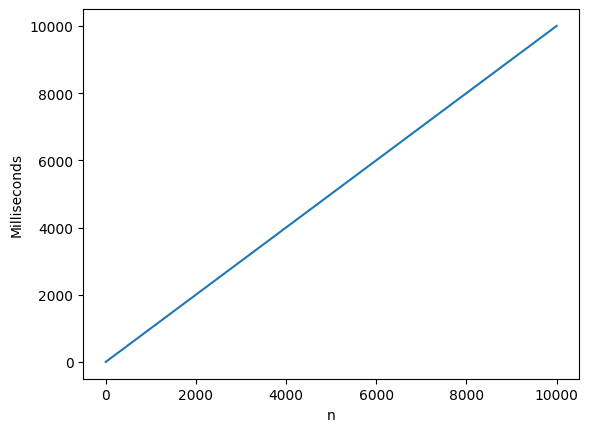

In [3]:
import seaborn as sns

# Gráfico comparativo da busca linear
ax = sns.lineplot(x = (0, 10000), y = (0, 10000))
ax.set(ylabel = "Milliseconds", xlabel = "n")

# TODO: Fazer gráfico com 6 retas, uma com cada busca linear

Também podemos observar a tendência assintótica dos algoritmos de busca binária, que possuem complexidade $O(\log n)$.

[Text(0, 0.5, 'Milliseconds'), Text(0.5, 0, 'n')]

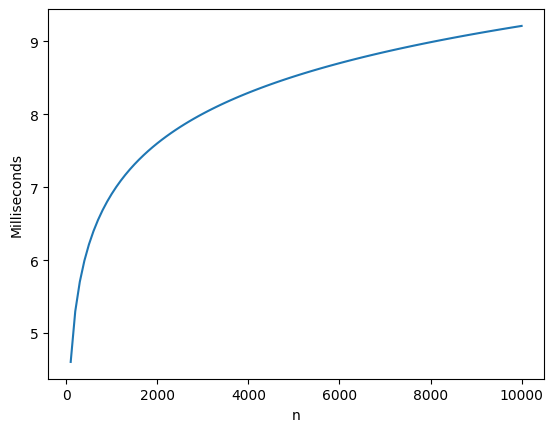

In [14]:
import math

# Gráfico comparativo da busca linear
x = range(100, 10001, 100)
y = [math.log(i) for i in x]
ax = sns.lineplot(x = x, y = y, )
ax.set(ylabel = "Milliseconds", xlabel = "n")

# TODO: Fazer cópia do Datagrid, ordená-lo e fazer gráfico com 4 curvas, uma com cada busca binária

Por fim, podemos comparar os 4 algoritmos de busca binária com suas contrapartes lineares. Temos que levar em consideração que enquanto a busca linear tem complexidade assintótica maior, a busca binária tem como pré-requisito que o DataGrid esteja ordenado, portanto precisamos incluir o tempo de ordenação na análise.

In [ ]:
# TODO: Plotar seis gráficos com o tempo da busca linear, com a busca binária, e com a busca binária somada ao tempo de ordenação.

blablabla conclusões das análises dos algoritmos de busca